In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, GeocentricTrueEcliptic

# Q1

### 1.a

Minor planet 136199 Eris has a right ascension of 01h46m55s, and a declination of -1d42m18, on Sep 2,2019.

**method:** 
We use tools in http://catserver.ing.iac.es/staralt/ for our analysis. In this program:

The MODE we use is chosen to be Staralt, so we need to specify the DATE, name of the OBSERVATORY, the OBJECT COORDINATE with the formats of name hh mm ss dd mm ss, Moon distance, OPTIONS and Output format. We set the maximum elevation to be 10 deg, corresponding to maximum airmass of 5.8.
 
We finally hit the RETRIEVE button and get the plot of altitude against time for a particular night below. 

**observation time:**
The observation should be above 30 degrees elevation and the sky has to be darker than 18 degree twilight. As elevation excess 30 after about 23:30pm and the sky is darker than 18 degree twilight before about 5:00am(both time are local time) the we know that the observation time should be about in this period. 
Hence the observation time is about 5.5 hour long

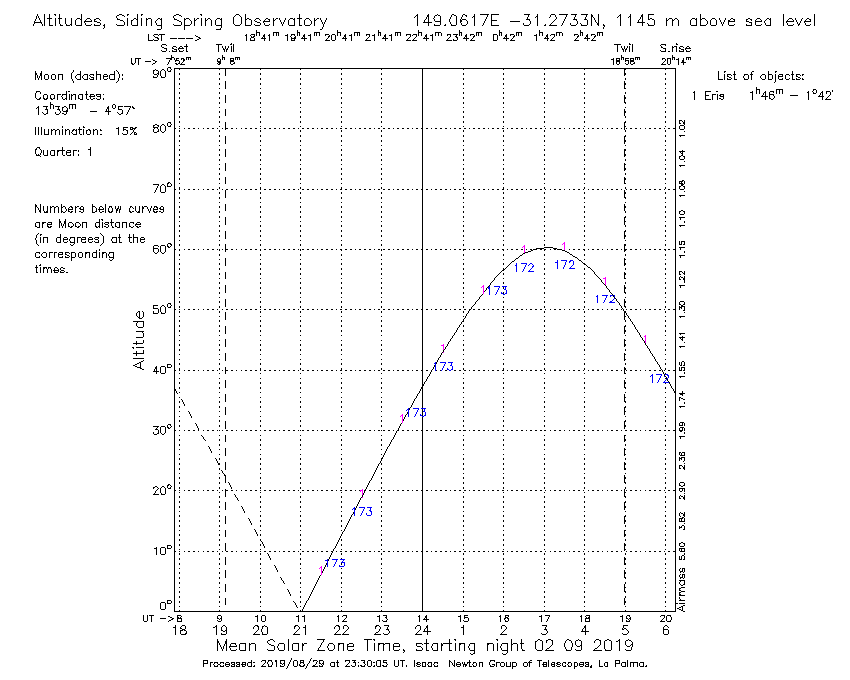

In [79]:
from IPython.display import Image
Image(filename='plot.png')

### 1.b

We define our coordinate of the planet by using astropy.coordinate in our code below. We choose the ICRS (Right ascension [RA], Declination [Dec]) to represent sky position. The code just automatically do the unit conversion to degree for both coordinates, telling us the right ascension is 26.73 degree.

In [2]:
co = SkyCoord('01h46m55s', '-1d42m18s', frame='icrs')
print(co)

ValueError: Latitude angle(s) must be within -90 deg <= angle <= 90 deg, got -317.43749999999994 deg

### 1.c
The brightness is defined relative to the brightest star in the
Northern hemisphere, $\alpha$ Lyrae or Vega. For any filter $F,$ we
have:
$$
\begin{aligned} m_{F} &=-2.5 \log _{10} \frac{f_{F}}{f_{F}, \text { Vega }} \\ f_{F} &=f_{F, \text { Vega }} 10^{-0.4 m_{F}} \end{aligned}
$$

Surface brightnesses are usually quoted in magnitudes per square arcsecond. For a source with a total or integrated magnitude m extending over a visual area of A square arcseconds, the surface brightness S is given by 
$$S=m+2.5\cdot \log_{10}A$$

**proof for this formula**:

As
$$f_{F} = f_{surface} \cdot A =f_{F, \text { Vega }} 10^{-0.4 S} \cdot 10^{\log_{10}A} = f_{F, \text { Vega }} 10^{-0.4 S+\log_{10}A} = f_{F, \text { Vega }} 10^{-0.4m} $$ 

We know that: 
$$ 
10^{-0.4 S+\log_{10}A} = 10^{-0.4m}
$$
$$ m = S-2.5\cdot \log_{10}A,$$ $$S=m+2.5\cdot \log_{10}A $$



Now we do the actual calculation for this problem:

As sky has a 21 magnitudes per square arcsec,the brightness of sky in a aperture with diameter equal to the seeing disk diameter of 2 arcsec is given by
$$
m_{sky}= S_{sky}-2.5\cdot \log_{10}A = 21-2.5\cdot \log_{10}(\pi) \approx 19.7571
$$

If the magnitude of object 1 is m$_1$ and the corresponding brightness is f$_1$, and for objsct 2 they are m$_2$ and f$_2$, for filter F. 
$$f_{1} =f_{F, \text { Vega }} 10^{-0.4 m_{1}}$$
$$f_{2} =f_{F, \text { Vega }} 10^{-0.4 m_{2}}$$
By simple algebra we have:
$$
\frac{f_1}{f_2} = 10^{-0.4(m_1-m_2)}
$$
Plug the magnitude of Eris $m_1 = 18.7$ and the magnitude of sky $m_2 = 19.7571$, we know that Eris is about 2.65 times brighter than the sky.

In [81]:
mag = lambda S, A: S-2.5*np.log10(A)
S = 21
d = 2
A = np.pi*(d/2)**2
m_2 = mag(S,A)
print('The brightness in magnitude of sky is {:.4f}'.format(m_2))

m_1 = 18.7
ratio = 10**(-0.4*(m_1-m_2))
print('Eris is about %.2f times brighter than the sky'%ratio)

The brightness in magnitude of sky is 19.7571
Eris is about 2.65 times brighter than the sky


### 1.d

We use the following code to calculate the geocentric ecliptic coordinate of Eris. The Eris is -11.90 degree from the ecliptic plane.

In [82]:
#Pick an observational time
obstime = Time('2019-9-02 12:00:00')
#Let's convert to geocentric coords. Note that these details can be found at:
#https://docs.astropy.org/en/stable/api/astropy.coordinates.GeocentricTrueEcliptic.html
c_gc = co.transform_to(GeocentricTrueEcliptic(obstime=obstime))
c_gc

<SkyCoord (GeocentricTrueEcliptic: equinox=J2000.000, obstime=2019-09-02 12:00:00.000): (lon, lat, distance) in (deg, deg, )
    (24.16926906, -11.89543649, 1.)>

# Q2

### 2.a

Recall the formula for distance modulus is that:
$m-M=5 \log _{10}\left(\frac{d}{10 \mathrm{pc}}\right)$, where m is the apparent magnitude, M is absolute magnitude and d is the distance to the object, so the distance 
$$d = 10\mathrm{pc}\times 10^{\frac{m-M}{5}}$$.

Observing the star with a signal-to-noise ratio of 5 allow us observe to magnitude limit of 23. As the absolute magnitude of the horizontal branch star is 0.7, we can use above formula to calculate the distance to detect the Horizontal branch star with SNR of 5 and the result is 288.40kpc. 

In [83]:
distance = lambda m,M: (10*u.pc*10**((m-M)/5)).to(u.kpc)
m = 23
M = 0.7
print('The distance to detect the Horizontal branch star with SNR of 5 is that {:.2f}'.format(distance(m, M)))

The distance to detect the Horizontal branch star with SNR of 5 is that 288.40 kpc


### 2.b

Observation of horiontal branch star of magnitude 15 tells us the distance and distance modulus. We calcualte them using the above equation in 2.a.
The distance to detect the Horizontal branch star for this observation is that 7.24 kpc
The distance modulus is 14.30

In [84]:
m = 15
d = distance(m, M)
distance_modulus = m-M
print('The distance to detect the Horizontal branch star for this observation is that {:.2f}'.format(d))
print('The distance modulus is {:.2f}'.format(distance_modulus))

The distance to detect the Horizontal branch star for this observation is that 7.24 kpc
The distance modulus is 14.30


### 2.c

Recall that the signal to noise ratio is proportional to $\sqrt{N}$, where N is the number of photons recieved by detector. 

A 15 mins exposure will gives SNR of 20. In order to achieve SNR of 40, we need to amplify the number of photons recieved by the square of 2,which is 4. As the number of photons recieved is propotional to the exposure time, this indicates that we need to amplify the exposure time by that factor also.
So we need to integrate $4 \times 15 \text{mins} = 60 \text{mins}$ in total, which means we have to integrate 45 mins longer.

# Q3

We compute the angular seperation between two which have their Right Ascension (RA, $\alpha$)  Declination (Dec, $\delta$).

From the equation in spherical coordinate, we know easily that the infinitesmall angular seperation is given by(note that $\delta$ is from -90 to 90 deg, not 0 to 180 deg. The 90 deg phase shift makes it $cos(\delta)$ not $sin(\delta)$ in the formula as $cos\delta = sin(\delta+90)$): 


$$d\theta^2 = d\delta^2+ cos^2\delta d\alpha^2 $$

In the calculation below there is no change in declination $\delta$:
$$d\delta = 0$$
$$\delta = const$$
so above formula simplifies to:
$$d\theta = cos\delta d\alpha$$
By integration we get:
$$\Delta \theta = cos\delta \Delta \alpha$$

For two stars which both have declination -5 degrees and have RA of 23 and 1 hours. $\Delta \alpha = 2h \times 15 degree/hour = 30 degree$
so we know that their angular seperation is about 29.89 deg.

For two stars which both have declination -85 degrees and have RA of 1 and 3 hours. $\Delta \alpha = 2h \times 15 degree/hour = 30 degree$
so we know that their angular seperation is about 2.61 deg.

In [85]:
dec1 = -5*np.pi/180
d_ra1 = 30*np.pi/180

dec2 = -85*np.pi/180
d_ra2 = 30*np.pi/180
ang_sep = lambda dec,d_ra: np.cos(dec)*d_ra*180/np.pi
a1 = ang_sep(dec1, d_ra1)
a2 = ang_sep(dec2, d_ra2)

print('angular seperation for two stars(first group) is %.2f deg'%a1)
print('angular seperation for two stars(second group) is %.2f deg'%a2)

angular seperation for two stars(first group) is 29.89 deg
angular seperation for two stars(second group) is 2.61 deg


# Q4

The total gravitational potential energy of a white dwarf is $\frac{\alpha GM^2}{R}$, where we approximate $\alpha$ as 1. 

The energy from nuclear fusion of C to Fe can power the white dwarf exploding as type Ia supernova. The energy released in this process is $\epsilon Mc^2$, where $\epsilon$ is the fraction of mass loss to the total mass in nuclear fusion. The atomic mass of C is 12.0000u and that of Fe is 55.9349u. Assuming the all C change into Fe in white dwarf, the fraction of mass loss is therefore $12/12 - 55.9349/56 \approx 0.00116$.

Type Ia SN requires that at Chandrasekhar mass, the energy generated by nuclear fusion is enough to explode the white dwarf, rather than gravitational energy, so
$$
\epsilon Mc^2 \geq \frac{GM^2}{R}
$$
$$
R \geq \frac{GM}{\epsilon c^2}
$$

The mass M in above eq is Chandrasekhar mass, which is  
$$
M_{\mathrm{ch}}=0.21\left(\frac{\mathcal{Z}}{A}\right)^{2}\left(\frac{h c}{G m_{p}^{2}}\right)^{3 / 2} m_{p}
$$
where $Z/A \approx 0.5$ is the ratio of atomic number and atomic mass number.

So the minimum value for R is given as $$R_{min} = \frac{G M_{ch}}{\epsilon c^2},$$ which is 0.0028R$_{sun}$.

In [86]:
M_ch = 0.21*0.5**2*(c.h*c.c/c.G/c.m_p**2)**(3/2)*c.m_p
M_ch = M_ch.to(u.M_sun)
print('The Chandrasekhar mass is {:.3f}'.format(M_Fe))

R_min = lambda epsilon,M: c.G*M/epsilon/c.c**2

epsilon = 1-55.9349/56
R_min = R_min(epsilon, M_ch).to(u.R_sun)
print('minimum value for radius is {:.3}'.format(R_min))

The Chandrasekhar mass is 1.321 solMass
minimum value for radius is 0.0028 solRad
